In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Deep Learning (CNN)

#### This is the dataset of pizza company, in this we have two categories of pizza (1) Good Pizza and (2)Burnt Pizza. Our task is to build a model to classify good and burnt pizza.

Here I am using CNN(Convolutional Neural Network) to build our model and train the model with the data I have for now.

#### Required Tools:
    
    - Pandas
    - Numpy
    - Matplotlib
    - Seaborn
    - Scikit-Learn
    - Tensorflow 2
    - Keras
    
**Architecture of model:**

    - Initialize Model
    - Build CNN
    - Build ANN
    - Compile Model
    - Load Dataset
    - Data Augmentation
    - Fit model on Train and Validation data
    - Throw new dataset to our model
    - Check the performance of our model
    
 ## Import Required Tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

**Now first I will build our deep learning model for pizza classifier**
To build network we need to call our model: Sequential and layers: Dense, Conv2D, MaxPooling2D, and Flatten

    1. Dense: Dense layer is used in building ANN network
    2. Conv2D: It is convolutional layer for CNN.
    3. MaxPooling2D: It is second layers which is been use after convolutional layer
    4. Flatten: Flatten layer converts our input to 1D
    
First I will build CNN network then ANN, once our network is ready we will summarize to learn something from that network. 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [4]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='VALID',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='VALID',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='VALID',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='VALID',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())



Our CNN model is ready, just a random model initially we don't have any ideas about how our model is performing untill we train and see result, then only we can relate some amount of idea or simply tweaking and tuining our model to check it's performance.

`model=Sequential()`

The above line is simply to understand that I just initialize the model on model variable.

`model.add(Conv2D(filters=32,kernel_size=3,padding='VALID',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))`

In our model I added convolutional layer and there are hyperparameter in Convolutional layer like: filter_size, kernel_size, padding, striding, activation, and input_shape only needed on first layer,

Second is my pooling layer and size of pool is mentioned.

`model.add(Flatten())`
[Flatten Layer](https://developersbreach.com/convolution-neural-network-deep-learning/) Refer this for detail understanding.

Now my CNN network is ready, let's go and build ANN network now

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

We can see the parameters of our CNN network

Now next is our ANN network

In [6]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=256,activation='relu',kernel_initializer='uniform'))

model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

As mentioned earlier Dense is our ANN layer. When we solve any problem only by ANN then in the first layer we need to specify our input_shape(x,y,z) or input_dim((x * y), z). In this I did not specify the input because my input is Flatten which is comming from CNN network and it is connected it will understand the input shape by itself.

In Dense layer `units` values are the number of neurons in ANN layers there are too much summission and activation.
last is our output layer where unit is 1 because it is binary problem we have 0 and 1 to predict that's why activation is sigmoid in last layer.

In [7]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

Model is completed now next part is to import dataset and do some data augmentation before fitting it to model.

**Data Augmentation:** Data augmentation is the process to see images at differents attributes like by zooming in or out, turning and flipping and also we need to rescale our dataset.

### Data Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

### Importing dataset and throwing on augmentation parameters

In [10]:
train_set = train_datagen.flow_from_directory (
    '/content/drive/MyDrive/Stage 2/CNN/train_set',\
    target_size=(224, 224),\
    batch_size=30,\
    class_mode='binary')

val_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Stage 2/CNN/val',\
        target_size=(224, 224),\
        batch_size=30,\
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


we can see that total 2000 images we have to train our model, which is not enough but for learning perspective it is fine to have this count.

2000 images splitted into train set 1600 and 400 in validation set

From train set there are 800 images of each category cat or dog, same as in validation set split of 200 in each category.

In [11]:
len(train_set)

54

we saw that our training images having 1600 count and here it is showing 54 why?

Nothing to worry because I distributed images into chunks or batch of size 30. Now calculate the count of batch required for 1600 images.

Now I am going to fit our model on train set and validation set.

In [12]:
model.fit(
        train_set,
        epochs=30,
        validation_data=val_set
)


Epoch 1/30
54/54 [==============================] - 24s 376ms/step - loss: 0.6883 - accuracy: 0.5456 - val_loss: 0.6773 - val_accuracy: 0.6625
Epoch 2/30
54/54 [==============================] - 20s 372ms/step - loss: 0.6610 - accuracy: 0.6069 - val_loss: 0.6531 - val_accuracy: 0.6525
Epoch 3/30
54/54 [==============================] - 20s 372ms/step - loss: 0.5979 - accuracy: 0.6712 - val_loss: 0.6142 - val_accuracy: 0.6675
Epoch 4/30
54/54 [==============================] - 20s 373ms/step - loss: 0.5646 - accuracy: 0.7150 - val_loss: 0.5691 - val_accuracy: 0.6850
Epoch 5/30
54/54 [==============================] - 20s 373ms/step - loss: 0.5147 - accuracy: 0.7481 - val_loss: 0.5771 - val_accuracy: 0.7675
Epoch 6/30
54/54 [==============================] - 20s 369ms/step - loss: 0.5163 - accuracy: 0.7513 - val_loss: 0.5322 - val_accuracy: 0.7200
Epoch 7/30
54/54 [==============================] - 20s 373ms/step - loss: 0.4475 - accuracy: 0.7887 - val_loss: 0.5337 - val_accuracy: 0.7250

### Load new data for prediction

In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Stage 2/CNN/test',
                                            target_size=(224,224),
                                            batch_size = 10,
                                            shuffle = False)

Found 104 images belonging to 1 classes.


First let's check on single image, how model is performing

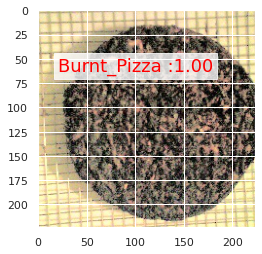

In [15]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Stage 2/CNN/val/Burnt_Pizza/100.jpeg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Good_Pizza :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Burnt_Pizza :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

So far the prediction is correct.

Now let's see the model performance

In [16]:
val_set.reset
ytesthat = model.predict_generator(val_set)
df = pd.DataFrame({
    'filename':val_set.filenames,
    'predict':ytesthat[:,0],
    'y':val_set.classes
})

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Burnt_Pizza/1 - Copy.jpg,0.99443,0,1
1,Burnt_Pizza/1.jpg,0.00002,0,0
2,Burnt_Pizza/10 - Copy.jpg,0.99995,0,1
3,Burnt_Pizza/10.jpg,0.00000,0,0
4,Burnt_Pizza/100 - Copy.jpeg,0.12841,0,0
5,Burnt_Pizza/100.jpeg,0.00007,0,0
6,Burnt_Pizza/101 - Copy.jpg,0.00271,0,0
7,Burnt_Pizza/101.jpg,0.00139,0,0
8,Burnt_Pizza/104 - Copy.jpg,0.81859,0,1
9,Burnt_Pizza/104.jpg,0.00007,0,0


In [18]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 400 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 400 Validation images : 198


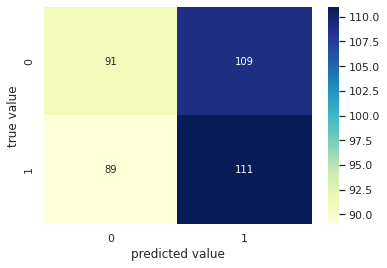

In [19]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

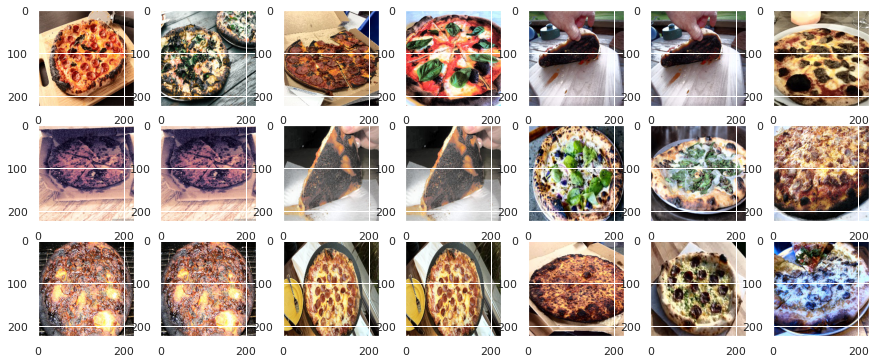

In [21]:
#Some of Burnt image misclassified as Good.
import matplotlib.image as mpimg

B_as_G = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/drive/MyDrive/Stage 2/CNN/val/'+B_as_G.iloc[i], target_size=(224, 224))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

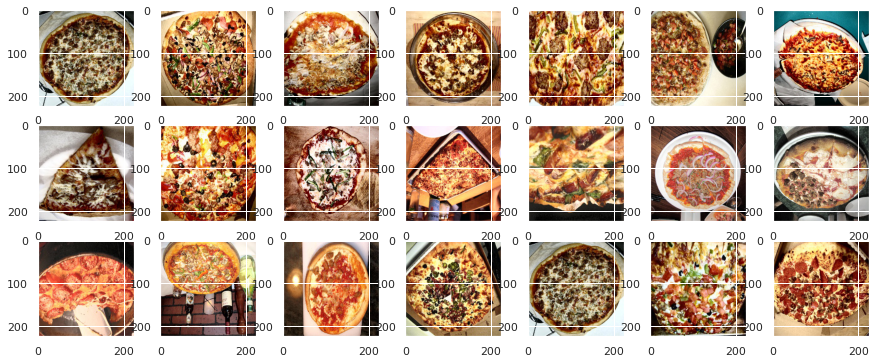

In [22]:
#Some of Good image misclassified as Burnt.
import matplotlib.image as mpimg

G_as_B = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/drive/MyDrive/Stage 2/CNN/val/'+G_as_B.iloc[i], target_size=(224, 224))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

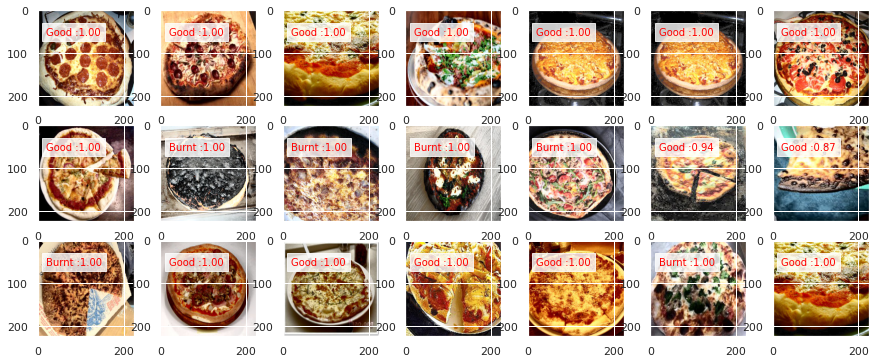

In [23]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('/content/drive/MyDrive/Stage 2/CNN/test/'+test_set.filenames[np.random.choice(range(104))], target_size=(224, 224))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Good :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Burnt :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

### Conclusion:

Our model performance is quite fine we can tweak this also by hyperparameter tuning and there are many things we can do. This is basic approach from my side whatever I did on my academy.